# Препроцессинг датасета

Импорты

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

Считываем данные из файла

In [28]:
import io

df = pd.read_csv("Laptop_price.csv")
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0           3.830296        16               512    11.185147  2.641094   
1           2.912833         4              1000    11.311372  3.260012   
2           3.241627         4               256    11.853023  2.029061   
3           3.806248        16               512    12.280360  4.573865   
4           3.268097        32              1000    14.990877  4.193472   
..               ...       ...               ...          ...       ...   
995         3.343584         4              1000    12.587095  3.162399   
996         2.780555         8               256    12.679356  3.750265   
997         3.200569         4               512    12.666315  3.392612   
998         1.604182         8               256    11.215581  3.857613   
999         1.711980         4               256    16.561498  3.440883   

            Price  Brand_code  
0    17395.093065           1  
1    31607.605919           0  
2  

<Axes: >

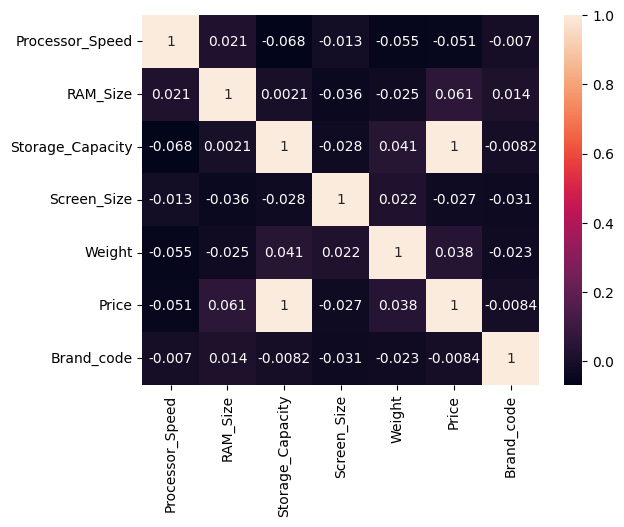

In [29]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Brand_code'] = label_encoder.fit_transform(df['Brand'])
df = df.drop('Brand', axis=1)
print(df)
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Storage_Capacity', ylabel='Price'>

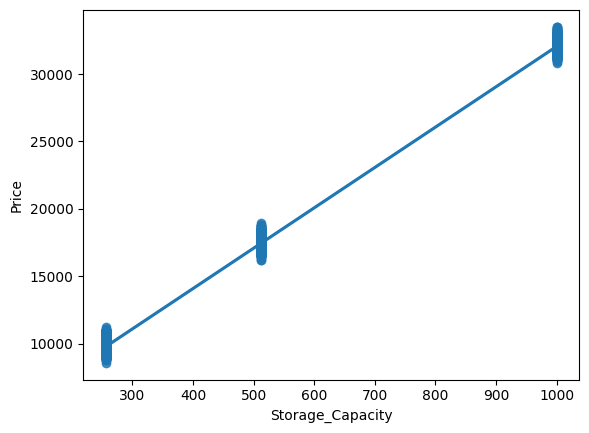

In [30]:
# for name in df.columns:
sns.regplot(x="Storage_Capacity", y="Price", data=df)


In [31]:
for label in df.columns:
  print(label, len(df[label].value_counts()))


Processor_Speed 1000
RAM_Size 4
Storage_Capacity 3
Screen_Size 1000
Weight 1000
Price 1000
Brand_code 5


C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


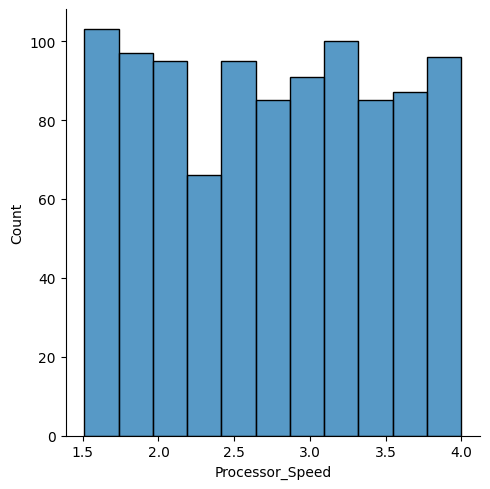

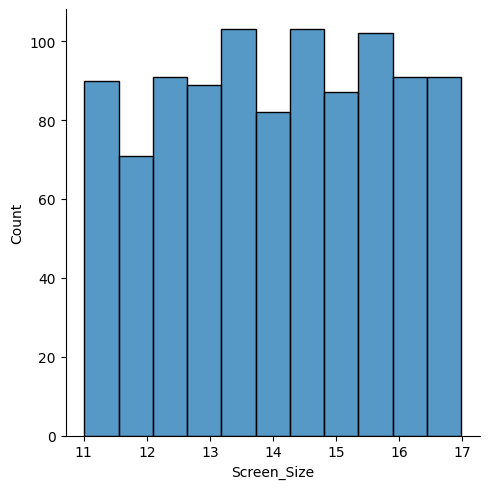

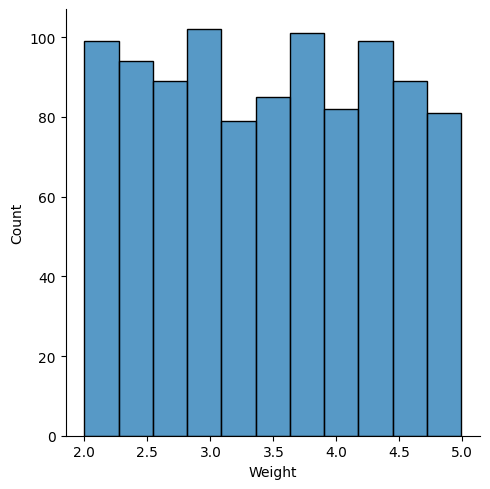

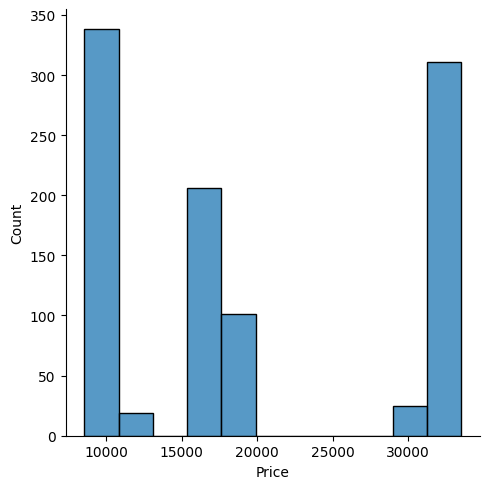

In [32]:
columns=['Processor_Speed','Screen_Size', 'Weight','Price']
for name in columns:
  sns.displot(df[name])

In [33]:
for label in columns:
  df[label+"_category"] = pd.qcut(df[label], q=3, labels=['Low', 'Medium', 'High'])
  df = df.drop(label, axis=1)

print(df)

     RAM_Size  Storage_Capacity  Brand_code Processor_Speed_category  \
0          16               512           1                     High   
1           4              1000           0                   Medium   
2           4               256           4                     High   
3          16               512           0                     High   
4          32              1000           0                     High   
..        ...               ...         ...                      ...   
995         4              1000           3                     High   
996         8               256           2                   Medium   
997         4               512           2                     High   
998         8               256           1                      Low   
999         4               256           4                      Low   

    Screen_Size_category Weight_category Price_category  
0                    Low             Low         Medium  
1                  

In [34]:
def entropy(labels):
  unique_labels, counts = np.unique(labels, return_counts=True)

  probabilities = counts / len(labels)

  entropy_value = -np.sum(probabilities * np.log2(probabilities))
  return entropy_value

def gain_ratio(data, target, feature):
  total_entropy = entropy(data[target])
  feature_entropy = 0
  for value in data[feature].unique():
    subset = data[data[feature] == value]
    prob = len(subset) / len(data)
    entropy_value = entropy(subset[target])
    feature_entropy += prob * entropy_value

  information_gain = total_entropy - feature_entropy

  split_info = -np.sum([(len(data[data[feature] == value]) / len(data)) * np.log2(len(data[data[feature] == value]) / len(data)) for value in data[feature].unique()])

  if split_info == 0:
    gain_ratio_value = 0
  else:
    gain_ratio_value = information_gain / split_info
  return gain_ratio_value

for label in df.columns:
  print(f'{label} = {gain_ratio(df, "Price_category", label)}')


RAM_Size = 0.00518144022202595
Storage_Capacity = 0.9083104888695973
Brand_code = 0.003028607961208953
Processor_Speed_category = 0.0024571504563597768
Screen_Size_category = 0.0010030317350694553
Weight_category = 0.0033727090699586897
Price_category = 1.0


     RAM_Size  Storage_Capacity  Brand_code Processor_Speed_category  \
0          16               512           1                        3   
1           4              1000           0                        2   
2           4               256           4                        3   
3          16               512           0                        3   
4          32              1000           0                        3   
..        ...               ...         ...                      ...   
995         4              1000           3                        3   
996         8               256           2                        2   
997         4               512           2                        3   
998         8               256           1                        1   
999         4               256           4                        1   

    Screen_Size_category Weight_category Price_category  
0                      1               1              2  
1                  

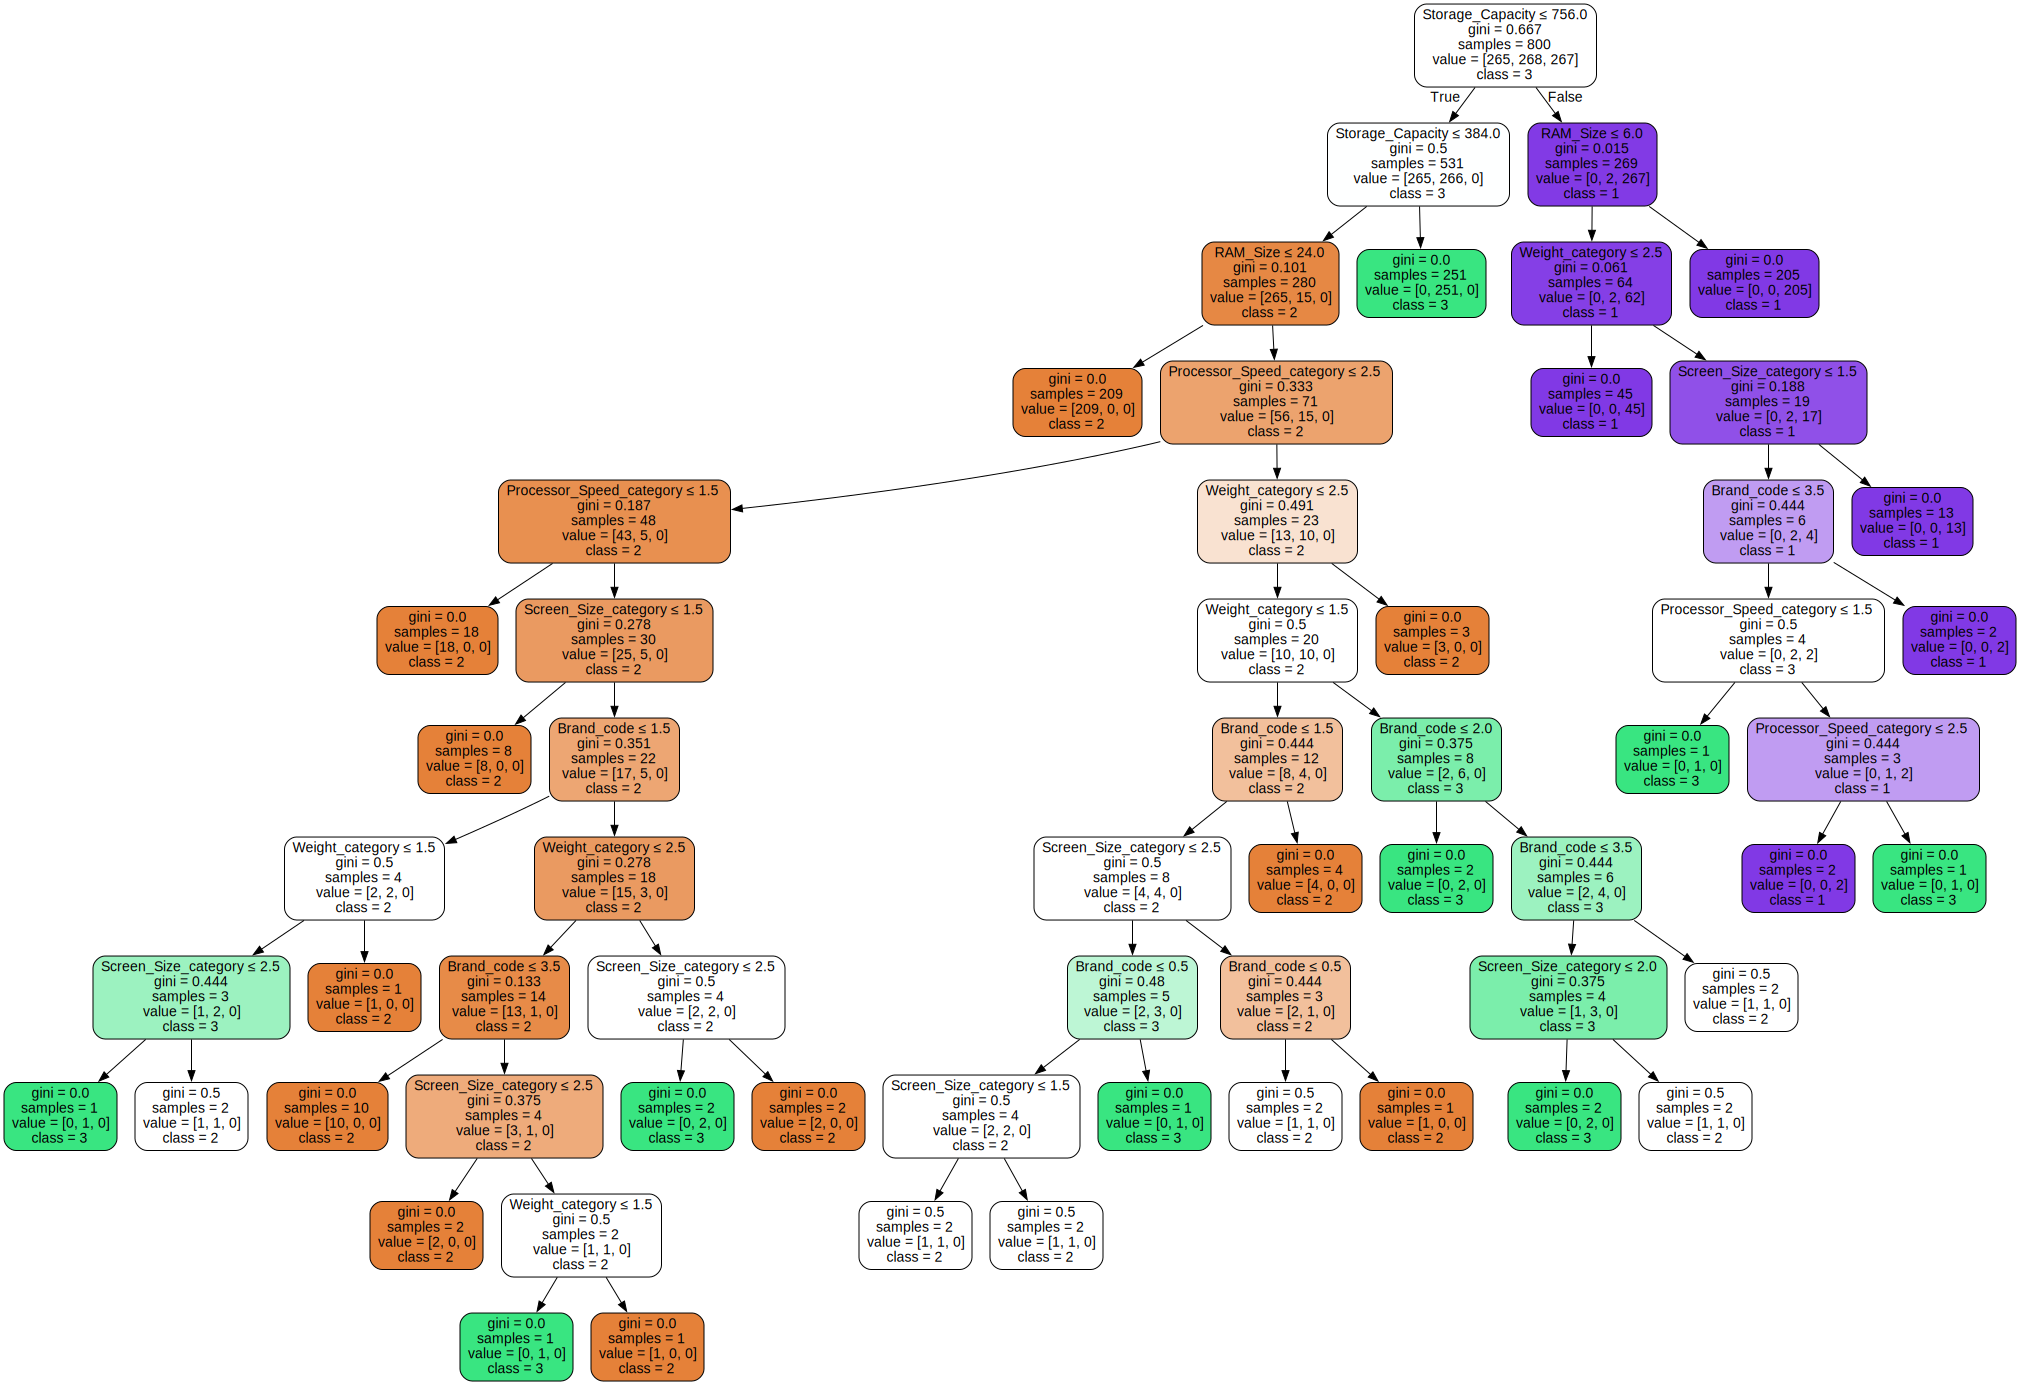

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv("Laptop_price.csv")
label_encoder = LabelEncoder()
df['Brand_code'] = label_encoder.fit_transform(df['Brand'])
df = df.drop('Brand', axis=1)
for label in columns:
  df[label+"_category"] = pd.qcut(df[label], q=3, labels=['1', '2', '3'])
  df = df.drop(label, axis=1)

print(df)
X = df.drop(columns=['Price_category'])
y = df['Price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier()

print(X_train, y_train)
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

dot_data = export_graphviz(tree_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [38]:
importance = tree_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1          Storage_Capacity    0.950006
5           Weight_category    0.011523
3  Processor_Speed_category    0.011424
4      Screen_Size_category    0.009706
0                  RAM_Size    0.009152
2                Brand_code    0.008188
